In [1]:
from numpy import *

In [52]:
# 预备知识
x = arange(9).reshape((3,3))
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [53]:
diag(x)

array([0, 4, 8])

In [54]:
diag(x, k=1)

array([1, 5])

In [55]:
diag(x, k=-1)

array([3, 7])

In [57]:
diag(diag(x))

array([[0, 0, 0],
       [0, 4, 0],
       [0, 0, 8]])

In [63]:
diag((1, 2, 3))

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [61]:
w, v = linalg.eig(diag((1, 2, 3)))  # 计算特征值及其协方差矩阵
w

array([1., 2., 3.])

In [62]:
v

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [64]:
array([[1, -1], [1, 1]])

array([[ 1, -1],
       [ 1,  1]])

In [65]:
w, v = linalg.eig(array([[1, -1], [1, 1]]))  # 计算特征值及其协方差矩阵
w

array([1.+1.j, 1.-1.j])

In [66]:
v

array([[0.70710678+0.j        , 0.70710678-0.j        ],
       [0.        -0.70710678j, 0.        +0.70710678j]])

In [68]:
a = array([[1, 1j], [-1j, 1]])
a

array([[ 1.+0.j,  0.+1.j],
       [-0.-1.j,  1.+0.j]])

In [69]:
w, v = linalg.eig(a)  # 计算特征值及其协方差矩阵
w

array([2.+0.j, 0.+0.j])

In [70]:
v

array([[0.        +0.70710678j, 0.70710678+0.j        ],
       [0.70710678+0.j        , 0.        +0.70710678j]])

In [71]:
a = array([[1 + 1e-9, 0], [0, 1 - 1e-9]])
a

array([[1., 0.],
       [0., 1.]])

In [73]:
w, v = linalg.eig(a)  # 计算特征值及其协方差矩阵
w

array([1., 1.])

In [74]:
v

array([[1., 0.],
       [0., 1.]])

In [123]:
# 将数据集封装为mat类型并返回
def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float, line)) for line in stringArr]
    return mat(datArr)

def pca(dataMat, topNfeat=9999999):
    meanVals = mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    # numpy.cov()解释，求协方差
    # 如果rowvar为非零（默认值），则每一行代表一个变量，各列中带有观察值。 
    # 否则，该关系将转置：每一列代表一个变量，而行包含观察值。
    covMat = cov(meanRemoved, rowvar=0) 
    eigVals, eigVects = linalg.eig(mat(covMat))  # 计算特征值及其协方差矩阵
    eigValInd = argsort(eigVals)  # 升序排序
#     print(eigValInd, eigVals)  # [0 1] [0.36651371 2.89713496]
    eigValInd = eigValInd[: -(topNfeat+1) : -1]  # 求最大的topNfeat下标
#     print(eigValInd)  # [1]
    redEigVects = eigVects[:, eigValInd]  # 提取找到的所有列
    lowDDataMat = meanRemoved * redEigVects  # 数据转换到新的空间
    reconMat = (lowDDataMat * redEigVects.T) + meanVals  # 降维后的数据
    return lowDDataMat, reconMat

In [124]:
dataMat = loadDataSet('testSet.txt')
dataMat

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

In [125]:
lowDMat, reconMat = pca(dataMat, 1)
shape(lowDMat)

(1000, 1)

In [126]:
lowDMat[: 3]

matrix([[-2.51033597],
        [-2.86915379],
        [ 0.09741085]])

In [127]:
reconMat

matrix([[10.37044569, 11.23955536],
        [10.55719313, 11.54594665],
        [ 9.01323877,  9.01282393],
        ...,
        [ 9.32502753,  9.52436704],
        [ 9.0946364 ,  9.14637075],
        [ 9.16271152,  9.2580597 ]])

In [128]:
import matplotlib
import matplotlib.pyplot as plt

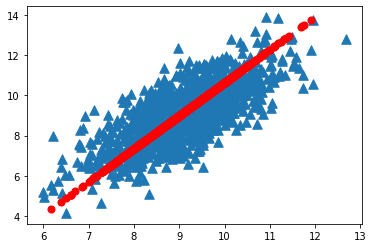

In [131]:
def drawScatter(dataMat, reconMat):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], \
               marker='^', s=90)

    ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], \
               marker='o', s=50, c='red')

drawScatter(dataMat, reconMat)

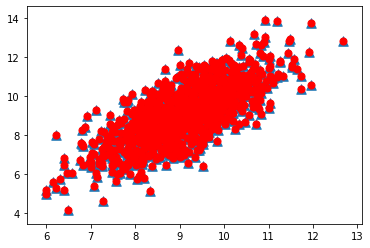

In [135]:
lowDMat , reconMat = pca(dataMat, 2)
drawScatter(dataMat, reconMat)

# 实例：利用PCA对半导体制造数据降维

In [145]:
# 用平均值代替空值
def replaceNanWithMean():
    datMat = loadDataSet('secom.data', ' ')
    numFeat = shape(dataMat)[1]
    for i in range(numFeat):
        # 求每个特征非NaN的平均值
        # isnan 返回True（1）、False（0）值
        meanVal = mean(datMat[nonzero(~isnan(datMat[:, i].A))[0], i])  
        # 将NaN值用平均值代替
        datMat[nonzero(isnan(datMat[:, i].A))[0], i] = meanVal
        
    return datMat

In [146]:
dataMat = replaceNanWithMean()

In [147]:
# 观察最后的结果，可以发现很多特征值为0，表明其是不重要的特征可以省略
# 同时前面的特征值可以筛选出最重要的，从而实现降维
meanVals = mean(dataMat, axis=0)
meanRemoved = dataMat - meanVals
covMat = cov(meanRemoved, rowvar=0)
eigVals, eigVects = linalg.eig(mat(covMat))
eigVals

array([ 5.34151979e+07,  2.17466719e+07,  8.24837662e+06,  2.07388086e+06,
        1.31540439e+06,  4.67693557e+05,  2.90863555e+05,  2.83668601e+05,
        2.37155830e+05,  2.08513836e+05,  1.96098849e+05,  1.86856549e+05,
        1.52422354e+05,  1.13215032e+05,  1.08493848e+05,  1.02849533e+05,
        1.00166164e+05,  8.33473762e+04,  8.15850591e+04,  7.76560524e+04,
        6.66060410e+04,  6.52620058e+04,  5.96776503e+04,  5.16269933e+04,
        5.03324580e+04,  4.54661746e+04,  4.41914029e+04,  4.15532551e+04,
        3.55294040e+04,  3.31436743e+04,  2.67385181e+04,  1.47123429e+04,
        1.44089194e+04,  1.09321187e+04,  1.04841308e+04,  9.48876548e+03,
        8.34665462e+03,  7.22765535e+03,  5.34196392e+03,  4.95614671e+03,
        4.23060022e+03,  4.10673182e+03,  3.41199406e+03,  3.24193522e+03,
        2.74523635e+03,  2.35027999e+03,  2.16835314e+03,  1.86414157e+03,
        1.76741826e+03,  1.70492093e+03,  1.66199683e+03,  1.53948465e+03,
        1.33096008e+03,  